# EMEPy Taper Example

This tutorial demonstrates how to design, simulate, and visualize a simple taper in EMEPy using the electromagnetic python module as a modesolver. This allows us to extend our simulation to multiple modes. A single mode taper is benchmarked and can be found in the benchmarks directory.

Begin by importing the necessary modules and defining our simulation parameters.

In [1]:
from emepy import Layer, EME, Mode, MSEMpy
import numpy as np
from matplotlib import pyplot as plt

# Geometric parameters
width1 = 0.7e-6  # Width of left waveguide
thickness1 = 0.22e-6  # Thickness of left waveguide
width2 = 0.3e-6  # Width of right waveguide
thickness2 = 0.22e-6  # Thickness of right waveguide
wavelength = 1.55e-6  # Wavelength of light (m)
length = 5e-6  # Length of the waveguides
taper_length = 0.75e-6  # The length of the taper
num_modes = 2 # Number of modes to solve for
taper_density = 7 # Number of taper segments
mesh=128 # Number of mesh points in each xy dimension

wg_length = 0.5 * (length - taper_length)  # Length of each division in the taper

### Create a simulation object

In [2]:
eme = EME()  # Choose either a normal eme or a periodic eme (PeriodicEME())

current state: start


### Now create the parameters for a single taper

We need one input waveguide modesolver and layer, one output, and a number in taper segments as previously defined.

In [3]:
# first layer is a straight waveguide
mode1 = MSEMpy(
    wavelength,
    width1,
    thickness1,
    num_modes=num_modes,
    mesh=mesh
)
straight1 = Layer(mode1, num_modes, wavelength, wg_length)
eme.add_layer(straight1)

# create the discrete taper with a fine enough taper density to approximate a continuous linear taper
widths = np.linspace(width1, width2, taper_density)
thicknesses = np.linspace(thickness1, thickness2, taper_density)
taper_length_per = taper_length / taper_density if taper_density else None

# add the taper layers
for i in range(taper_density):
    solver = MSEMpy(wavelength, widths[i], thicknesses[i], num_modes=num_modes, mesh=mesh)
    taper_layer = Layer(solver, num_modes, wavelength, taper_length_per)
    eme.add_layer(taper_layer)

# last layer is a straight waveguide of smaller geometry
mode2 = MSEMpy(wavelength, width2, thickness2, num_modes=num_modes, mesh=mesh)
straight2 = Layer(mode2, num_modes, wavelength, wg_length)
eme.add_layer(straight2)

### Create our monitor

In [4]:
monitor = eme.add_monitor(axes="xz")

### Run the simulation

In [5]:
eme.propagate(left_coeffs=[1])  # Run the eme

current state: mode_solving


100%|██████████| 9/9 [00:00<00:00, 18978.75it/s]


current state: finished_modes
current state: layer_propagating


8it [00:00, 135300.13it/s]


current state: finished_layer
current state: network_building
current state: finished_network
current state: field_propagating


100%|██████████| 1/1 [00:00<00:00, 64.76it/s]


current state: finished


### Visualize the taper and the fields

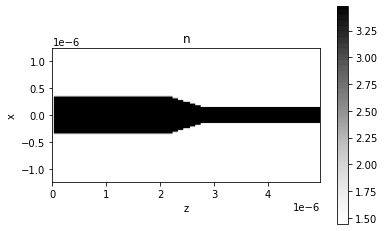

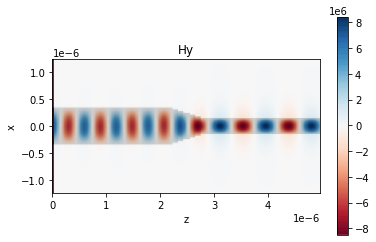

In [6]:
plt.figure()
monitor.visualize(component="n")
plt.colorbar()
plt.show()

plt.figure()
monitor.visualize(component="Hy")
plt.colorbar()
plt.show()